###  Logistic Regression for binary class classification problem using scikit learn and pandas
1. Loading the required libraries
   - Pandas library for basic preprocessing
   - sklearn.model_selection for making a train test split
   - sklearn.linear_models for building logistic regression
   - sklearn.metrics for evaluating the results
2. Reading the data using pandas
3. Observing the data variables, understanding the data types
   - Are the attributes of type numeric or categorical
4. Preprocessing the data
   - Conversion of data types numeric to categorical, categorical to numeric if necessary
5. Model Building and Evaluation
   - Building a linear regression model with default parameters
   - Evaluating the model performance by observing error metrics

#### Loading the required libraries

In [1]:
#Import pandas and numpy
import pandas as pd
import numpy as np

#For Preparing the data, perform logistic regression and result analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,auc

#For Visualizations
import matplotlib.pyplot as plt

#### Data

    Working to identify products at risk of backorder before the event occurs so the business has time to react. 
    The data has the information about the product issues, forecast, sales and performance.
    
    Target Attribute : went_on_backorder (Binary, Categorical)
    Yes or 1 : Product recalled
    No or 0  : Product not recalled

###### Identify Right Error Metrics

    Based on the businees.

#### Loading the data

In [2]:
data = pd.read_csv("BackOrders.csv",header=0)

#### Understand the Data

See the No. row and columns

In [3]:
data.shape

(61589, 23)

See the top rows of the data

In [4]:
data.head(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No


Display the columns

In [5]:
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

Shows a quick statistic summary of your data using describe

In [6]:
data.describe(include='all')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,...,61589.000000,61589.000000,61589.000000,61589.000000,61589,61589,61589,61589,61589,61589
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48145,61577,53792,59303,61569,50296
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,...,1.605400,-6.264182,-5.863664,1.205361,NaN,NaN,NaN,NaN,NaN,NaN
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,...,42.309229,25.537906,24.844514,29.981155,NaN,NaN,NaN,NaN,NaN,NaN
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,-99.000000,-99.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.620000,0.640000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,...,0.000000,0.820000,0.800000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,...,0.000000,0.960000,0.950000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Display data type of each variable

In [7]:
data.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

#### Missing Data

    Missing value analysis and dropping the records with missing values

In [8]:
data.isnull().sum()

sku                     0
national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

Observing the number of records before and after missing value records removal

In [9]:
print (data.shape)

(61589, 23)


In [10]:
#Since the number of missing values is about 5%. For initial analysis we ignore all these records
data=data.dropna(axis=0)

In [11]:
data.isnull().sum()
print(data.shape)

(58186, 23)


#### Coverting categorical target to numeric by replacing levels by numbers. 

In [12]:
#Converting all the string types to numeric as these are binary we need not create the dummies
data = data.replace(['Yes','No'],[1,0])

In [13]:
data.head(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,1,0,0,1,0,0
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,0,0,0,1,0,0
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,1,0,0,1,0,0


In [14]:
data.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue        int64
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk              int64
oe_constraint          int64
ppap_risk              int64
stop_auto_buy          int64
rev_stop               int64
went_on_backorder      int64
dtype: object

In [15]:
#To get the distribution in the target
pd.value_counts(data['went_on_backorder'].values, sort=False)

0    47217
1    10969
dtype: int64

#### Split the data in to train and test

sklearn.model_selection.train_test_split

    Split arrays or matrices into random train and test subsets

In [16]:
#Performing train test split on the data
X, y = data.loc[:,data.columns!='went_on_backorder'].values, data.loc[:,'went_on_backorder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


###### Separating out the sku column as it is not useful for analysis. 
    
    We are saving this instead of dropping as we may need it later to identify which product has backorder

In [17]:
sum(np.unique(data.sku, return_counts=True)[1])

58186

In [18]:
sku_train = X_train[:,0]
sku_test = X_test[:,0]

In [19]:
#Removing sku from the analysis
X_train = X_train[:,1:]
X_test = X_test[:,1:]

In [20]:
#To get the distribution in the target in train and test
print(pd.value_counts(y_train, sort=False))
print(pd.value_counts(y_test, sort=False))

0    33067
1     7663
dtype: int64
0    14150
1     3306
dtype: int64


### Model Building

#### Logistic regession 
1. Logistic regression is used for classification problems with two levels in target where one level is success and other is failure.
2. Logistic regression, like linear regression, can be understood mathematically as S= m1X1 + m2X2 + m3X3 +.... +mnXn where X1, X2, X3,...., Xn are the independent attributes/variables and S is natural log of odds i.e p is the probability of success the (1-p) is the probability of failure. S= ln(p/(1-p)) and m1, m2,....,mn are the coefficients of these independent variables X1, X2, X3.. respectively. 
3. The model stores the values of these coefficients and intercepts the values to predict the target (whether success or failure) given these independent attribute values


In [21]:
log_mod=LogisticRegression(random_state=123)
model=log_mod.fit(X_train,y_train)

C:\Users\aravi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aravi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Model Interpretation
Now the model stores the coefficient and intercept values. As we have observed, the equation gives log odds of success. From this we obtain the probability of success. Hence given the independent attributes, we obtain what is the probability of success.

So we must fix a threshold for the probabilities that below this value of probability we consider it a failure and above this value it is success. By default, during predictions, the threshold is fixed at 0.5 i.e. if p < 0.5 it is failure else it is success. This is internally done in sklearn. Hence when we predict using predict function, we directly get classes, instead of probabilities.

#### Predictions

In [22]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

#### Getting evaluation metrics and evaluating model performance

1. For a classification problem, our model is judged good if the predictions for both the levels match the actual values. To evaluate our model, we need to obtain a matrix with actual and predicted values to compute the proportion of correct predictions 
2. In sklearn. metrics we have a function confusion matrix that generates the matrix with actual and predicted values.
3. Using some methods like recall we can compute goodness of the model

In [23]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[32824   243]
 [ 6587  1076]]
[[14048   102]
 [ 2888   418]]


Observe the syntax for confusion_matrix where the first argument is actual values and second is predicted. So the rows are the actual values and columns are the predicted.
The target has two levels 0 and 1. By order, the first one of row/column is 0 level and second is 1 level. 
The entire first column gives how many records were predicted as 0 and entire first row is number of records that are actually 0

#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [24]:
Accuracy=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("TNR: ",TNR)
print("TPR: ",TPR)
print("Accuracy: ",Accuracy)

TNR:  0.992791519434629
TPR:  0.12643678160919541
Accuracy:  0.8287121906507791


In [25]:
from sklearn.metrics import precision_score,recall_score,accuracy_score 

In [26]:
print(accuracy_score(y_test,test_pred))
print(accuracy_score(y_train, train_pred))

0.8287121906507791
0.8323103363614044


Observe that the true positivr rate is 14% which means the model is not able to predict back orders. One of the reasons for it might be that number of records for class 0 is very much greater than those for class 1. In such cases we may try out class_weights in logistic regression arguments. If we set class_weight to balanced, then the error for misclassification for each class would be inversely proportional to the number of instances for each class

#### Plotting ROC curve to modify the threshold if necessary

1. Initially we have predicted the classes. This was easy because, by default the threshold was fixed at 0.5. Hence the probabilities got converted to 0 or 1 based on probability for that record
2. Now  the values of 0's and 1's itself are not sufficient to get the ROC curve. We need to have the probabilities.
3. We have a function called predict_proba that generates probalility for success which can be used for plotting ROC


In [27]:
train_pred_prob=model.predict_proba(X_train)

C:\Users\aravi\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [28]:
print (train_pred_prob[:5,])

[[0.94652084 0.05347916]
 [0.50591945 0.49408055]
 [0.50274557 0.49725443]
 [0.50258563 0.49741437]
 [0.60238209 0.39761791]]


In [29]:
train_pred_prob  = train_pred_prob[:,1]

predict_proba gives values for both success and failure. But we know that probability of failure= 1-probability of success. Thus it is sufficient for us to have only success probabilities. Hence we consider only success probabilities [:,1] is first column has success probabilities

In [30]:
print (train_pred_prob[:5])

[0.05347916 0.49408055 0.49725443 0.49741437 0.39761791]


#### Getting ROC curve to adjust the threshold 

In [31]:
fpr, tpr, thresholds = roc_curve(y_train, train_pred_prob)
roc_auc = auc(fpr, tpr)

#### Using matplotlib for plotting the ROC curve 

In [32]:
import matplotlib.pyplot as plt

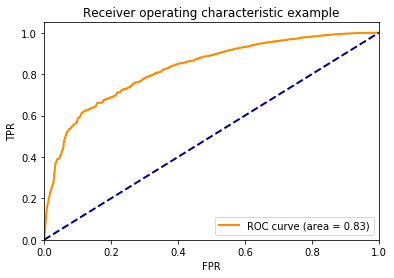

In [33]:
plt.figure()
lw = 2
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Defining a function to output the values of True Positive Rates and False Positive Rate given the value of threshold

In [34]:
def evaluate_threshold(threshold):
    print('TPR:', tpr[thresholds > threshold][-1])
    print('FPR:', fpr[thresholds > threshold][-1])

In [35]:
evaluate_threshold(0.5003)

TPR: 0.12292835704032364
FPR: 0.0065624338464329995


Writing the threshold values, tpr and fpr to a dataframe. This table would be useful for identifying appropriate threshold where there is very good TPR (true positive rate) and a reasonable FPR (false positive rate)

In [36]:
X=pd.DataFrame({'TPR':tpr,'TNR': 1-fpr, 'Threshold':thresholds})
pd.set_option('display.max_rows', 11000)
X

,TPR,TNR,Threshold
0,0.000000,1.000000,2.000000e+00
1,0.000130,1.000000,1.000000e+00
2,0.001305,1.000000,9.995232e-01
3,0.001305,0.999970,9.990861e-01
4,0.001435,0.999970,9.988727e-01
5,0.001435,0.999940,9.988641e-01
6,0.001566,0.999940,9.966438e-01
7,0.001566,0.999909,9.959033e-01
8,0.002088,0.999909,9.752706e-01
9,0.002088,0.999879,9.702062e-01
